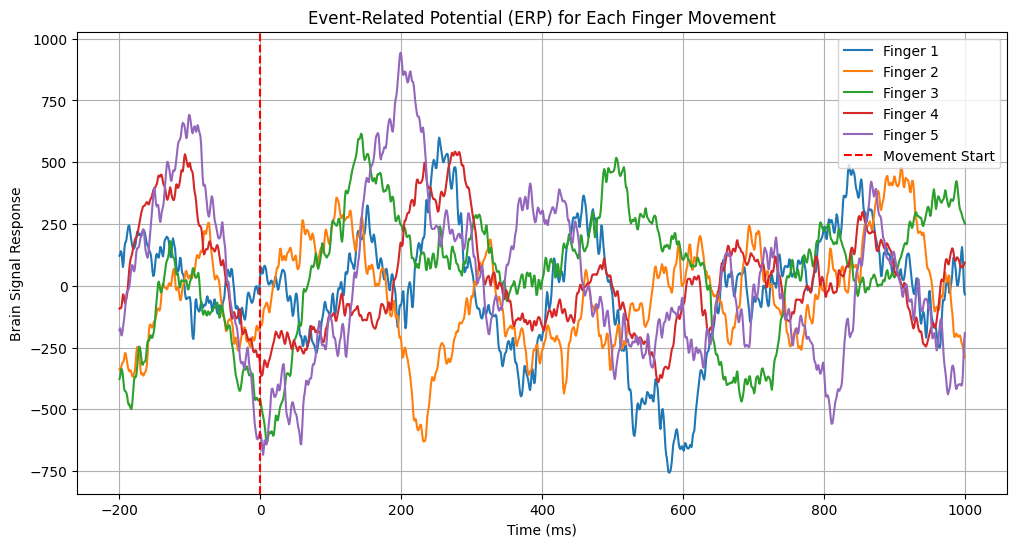

ERP Matrix Shape: (5, 1201)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def calc_mean_erp(trial_points_file, ecog_data_file):
    """
    Calculate the mean Event-Related Potential (ERP) for each finger.

    Parameters:
        trial_points_file (str): Path to the CSV file with trial points data (start, peak, finger).
        ecog_data_file (str): Path to the CSV file with ECoG brain data.

    Returns:
        fingers_erp_mean (numpy.ndarray): A 5x1201 matrix containing the mean ERP for each finger.
    """
    trial_points = pd.read_csv(trial_points_file, header=None, names=['start', 'peak', 'finger'], dtype=int)
    

    ecog_data = pd.read_csv(ecog_data_file, header=None, names=['signal'])

   
    window_before = 200  # 200 ms before
    window_after = 1000  # 1000 ms after
    total_timepoints = window_before + window_after + 1  
    finger_trials = {finger: [] for finger in range(1, 6)}

    for _, row in trial_points.iterrows():
        start = row['start']
        finger = row['finger']
        
        if start >= window_before and start + window_after < len(ecog_data):
            trial_data = ecog_data.iloc[start - window_before:start + window_after + 1]['signal'].values
            finger_trials[finger].append(trial_data)

    fingers_erp_mean = np.array([np.mean(finger_trials[finger], axis=0) if finger_trials[finger] else np.zeros(total_timepoints) for finger in range(1, 6)])

    time_axis = np.arange(-window_before, window_after + 1) 
    plt.figure(figsize=(12, 6))
    for i, erp in enumerate(fingers_erp_mean):
        plt.plot(time_axis, erp, label=f"Finger {i+1}")
    plt.axvline(x=0, color='red', linestyle="--", label="Movement Start")
    plt.xlabel("Time (ms)")
    plt.ylabel("Brain Signal Response")
    plt.title("Event-Related Potential (ERP) for Each Finger Movement")
    plt.legend()
    plt.grid()
    plt.show()

    return fingers_erp_mean

trial_points_file = '/Users/miyaestis/Desktop/src/events_file_ordered.csv'
ecog_data_file = '/Users/miyaestis/Desktop/src/brain_data_channel_one.csv'

fingers_erp_mean = calc_mean_erp(trial_points_file, ecog_data_file)
print("ERP Matrix Shape:", fingers_erp_mean.shape)
